In [52]:
pip install vaderSentiment


In [53]:
import numpy as np
import pandas as pd
import spacy
import tabulate
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import collections

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
df=pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

In [55]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [56]:
df.shape

(23486, 11)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [58]:
df["Division Name"].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [59]:
df["Department Name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [60]:
df["Class Name"].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [61]:
# Replace missing values in categorical columns with the most frequent value
df['Division Name'].fillna(df['Division Name'].mode()[0], inplace=True)
df['Department Name'].fillna(df['Department Name'].mode()[0], inplace=True)
df['Class Name'].fillna(df['Class Name'].mode()[0], inplace=True)

In [62]:
df.drop(labels =['Unnamed: 0','Title'],axis = 1,inplace = True)

In [63]:
df.head(5)

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [64]:
df = df.rename(columns={'Clothing ID': 'Clothing_ID','Review Text': 'Review_Text','Recommended IND': 'Recommended_IND',
                            'Positive Feedback Count': 'Positive_Feedback_Count', 'Division Name': 'Division_Name',
                            'Department Name': 'Department_Name', 'Class Name': 'Class_Name'})

In [65]:
df.head()

,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [66]:
numerical_columns = [i for i in df.columns if df[i].dtype == 'int64']
categorical_columns = [i for i in df.columns if i not in  numerical_columns]

In [67]:
print(list[numerical_columns])
print(list[categorical_columns])

list[['Clothing_ID', 'Age', 'Rating', 'Recommended_IND', 'Positive_Feedback_Count']]
list[['Review_Text', 'Division_Name', 'Department_Name', 'Class_Name']]


## Text Processing

In [68]:
df_train = pd.DataFrame(df)

In [69]:
pip install wordcloud

In [70]:
import re
def sentence_rge(df):
    df = re.sub('<[^>]*>','',str(df))
    df = re.sub('[\W]+',' ',df.lower())
    return df

df_train['Review_Text'] = df_train['Review_Text'].apply(sentence_rge)

In [71]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df_train['Review_Text'] =df_train['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_train.head()

,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,love dress s sooo pretty happened find store m...,5,1,4,General,Dresses,Dresses
2,1077,60,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses
3,1049,50,love love love jumpsuit s fun flirty fabulous ...,5,1,0,General Petite,Bottoms,Pants
4,847,47,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses


# bar chart

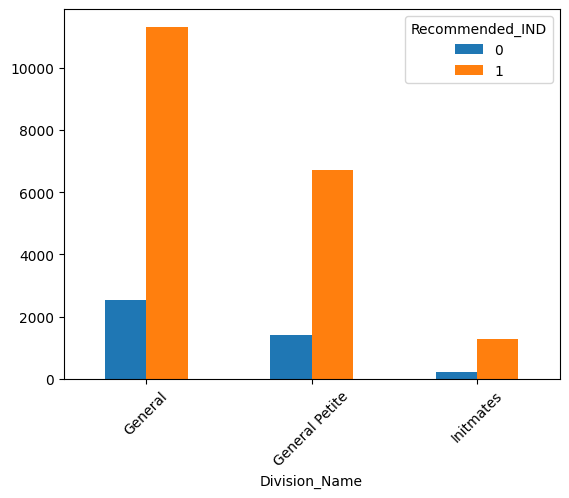

In [73]:
df.groupby(['Division_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
plt.xticks(rotation=45);

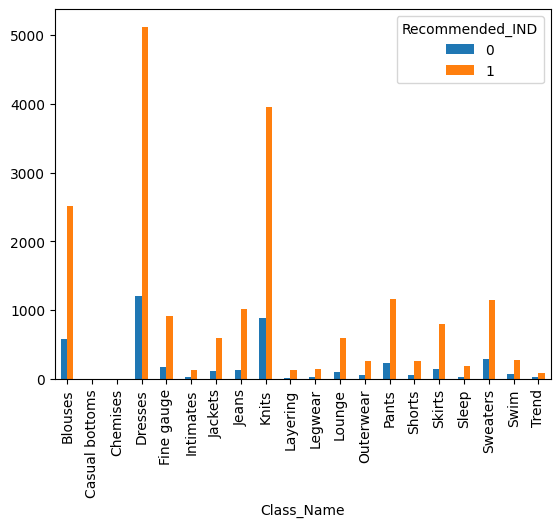

In [74]:
df_train.groupby(['Class_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar();

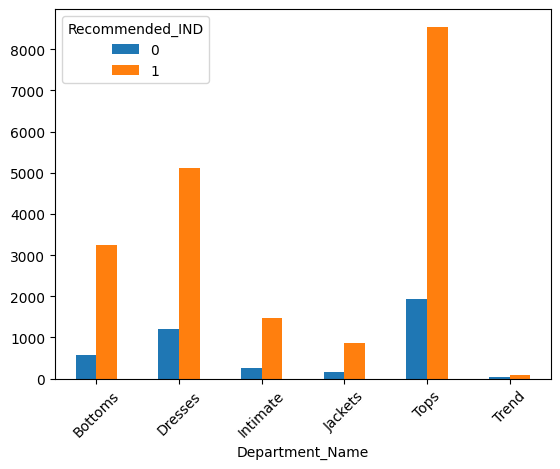

In [75]:
df.groupby(['Department_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
plt.xticks(rotation=45);

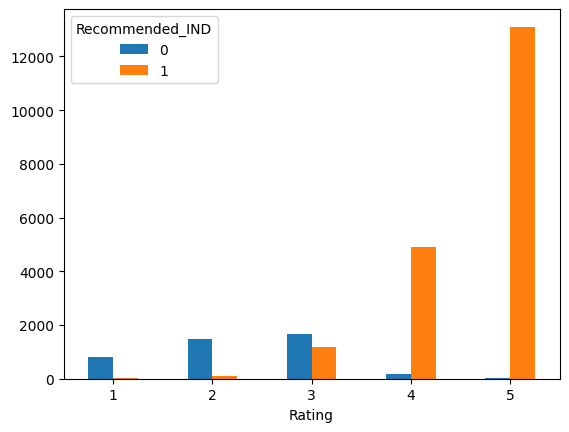

In [76]:
df.groupby(['Rating','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
plt.xticks(rotation=0);

# Apply Vader

In [77]:
vader = SentimentIntensityAnalyzer()

In [78]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [79]:
df_train.head()

,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,love dress s sooo pretty happened find store m...,5,1,4,General,Dresses,Dresses
2,1077,60,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses
3,1049,50,love love love jumpsuit s fun flirty fabulous ...,5,1,0,General Petite,Bottoms,Pants
4,847,47,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses


In [80]:
df_train_1 = df_train.copy()
df_train_1['tb_polarity'] = df_train_1.Review_Text.apply(detect_tb_polarity)

vader = SentimentIntensityAnalyzer()
df_train_1['vader_comp'] = df_train_1.Review_Text.apply(detect_vader_comp)

In [81]:
df_train_1.head()

,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tb_polarity,vader_comp
0,767,33,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.8991
1,1080,34,love dress s sooo pretty happened find store m...,5,1,4,General,Dresses,Dresses,0.318750,0.9700
2,1077,60,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses,0.082300,0.9062
3,1049,50,love love love jumpsuit s fun flirty fabulous ...,5,1,0,General Petite,Bottoms,Pants,0.500000,0.9464
4,847,47,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,0.458333,0.9062


# WordCloud (Compound Score)

In [82]:
scores = df_train_1.vader_comp

In [83]:
Label = []
length = len(scores)
for i in range(length):
    Score = scores[i]
    if Score >= 0.05: # Positive Text
        Label.append(1)
    elif Score <= -0.05: # Negative Text
        Label.append(0)
    else:
        Label.append(2) # Neutral Text

In [84]:
df_modify = dict()
df_modify["Review_Text"] = df_train_1["Review_Text"]
df_modify["Label"] = Label
df_last = pd.DataFrame(df_modify)

In [85]:
df_last.drop(df_last[df_last['Label'] == 2].index, inplace = True)
df_last.head()

,Review_Text,Label
0,absolutely wonderful silky sexy comfortable,1
1,love dress s sooo pretty happened find store m...,1
2,high hopes dress really wanted work initially ...,1
3,love love love jumpsuit s fun flirty fabulous ...,1
4,shirt flattering due adjustable front tie perf...,1


In [86]:
df_last.isnull().sum()

Review_Text    0
Label          0
dtype: int64

In [87]:
print(df_last["Label"].value_counts())

1    21633
0      717
Name: Label, dtype: int64


In [88]:
stopwords.update(['nan', 'dress', 'shirt', 's', 'm', 'top', 'color', 'bought', 'look', 'ordered'])

Positive words are as follows


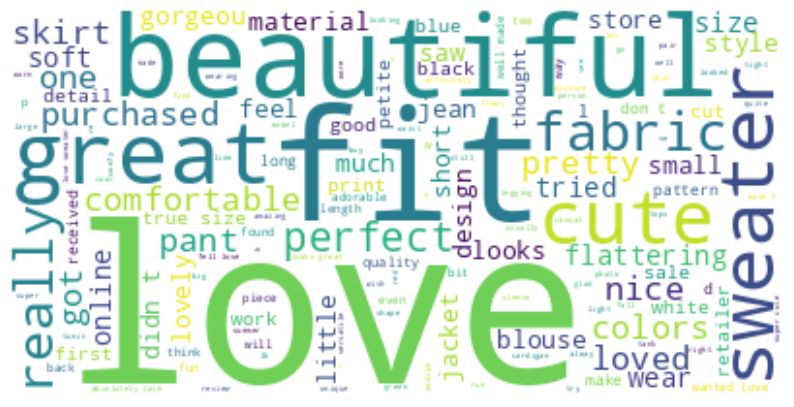

In [89]:
Positive_Data = df_last[df_last["Label"] == 1]
Positive_Data = Positive_Data["Review_Text"]
Negative_Data = df_last[df_last["Label"] == 0]
Negative_Data = Negative_Data["Review_Text"]

# Convert Data to String
Positive_Data_2 = Positive_Data.to_string()

print("Positive words are as follows")
Wordcloud_P = WordCloud(stopwords=stopwords, background_color='white').generate(Positive_Data_2)
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud_P, interpolation='bilinear')
plt.axis("off")
plt.show()


Negative words are as follows


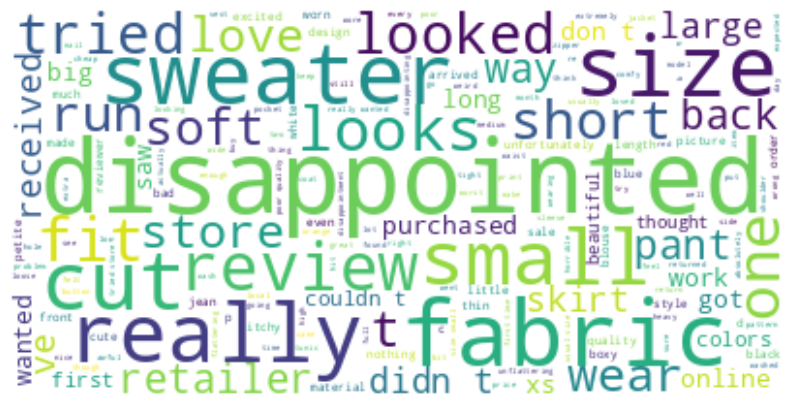

In [90]:
Negative_Data_2 = Negative_Data.to_string()
print("Negative words are as follows")
Wordcloud_N = WordCloud(stopwords=stopwords, background_color='white').generate(Negative_Data_2)
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud_N, interpolation='bilinear')
plt.axis("off")
plt.show()

## Predictive Modeling

In [91]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=None,use_idf=True,norm='l2'
,smooth_idf=True)
y_train=df_last.Label.values
x_train=tfidf.fit_transform(df_last.Review_Text)

In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,random_state=30,test_size=0.3,shuffle=False)

In [93]:
print(Counter(Y_train))

Counter({1: 15160, 0: 485})


In [94]:
type(Y_train)

numpy.ndarray

In [95]:
sm = SMOTE(random_state = 2)
X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)

In [96]:
print(Counter(Y_train_sm))

Counter({1: 15160, 0: 15160})


In [97]:
#build a list of dictionariese of 5 models.
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state=0),
},
{
    'label': 'Naive Bayes',
    'model': MultinomialNB(),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(max_depth=2, random_state=0),
}
]

In [98]:
#calculate Accuracy, Recall, F1-Score, Confusion Matrix
for n in models:
    model = n['model']
    model.fit(X_train_sm,Y_train_sm)
    Y_pred=model.predict(X_test)

    print('%s'%n['label'])
    print("Accuracy: "+str(accuracy_score(Y_test, Y_pred)))
    print("Recall: "+str(recall_score(Y_test, Y_pred, average="weighted")))
    print("F1-Score: "+str(f1_score(Y_test, Y_pred, average="weighted")))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))

Logistic Regression
Accuracy: 0.9574944071588367
Recall: 0.9574944071588367
F1-Score: 0.9620603113340621
Confusion Matrix
[[ 157   75]
 [ 210 6263]]
              precision    recall  f1-score   support

           0       0.43      0.68      0.52       232
           1       0.99      0.97      0.98      6473

    accuracy                           0.96      6705
   macro avg       0.71      0.82      0.75      6705
weighted avg       0.97      0.96      0.96      6705

Naive Bayes
Accuracy: 0.9205070842654736
Recall: 0.9205070842654736
F1-Score: 0.9363188308079675
Confusion Matrix
[[ 137   95]
 [ 438 6035]]
              precision    recall  f1-score   support

           0       0.24      0.59      0.34       232
           1       0.98      0.93      0.96      6473

    accuracy                           0.92      6705
   macro avg       0.61      0.76      0.65      6705
weighted avg       0.96      0.92      0.94      6705

Decision Tree
Accuracy: 0.9400447427293065
Recall: 0.940

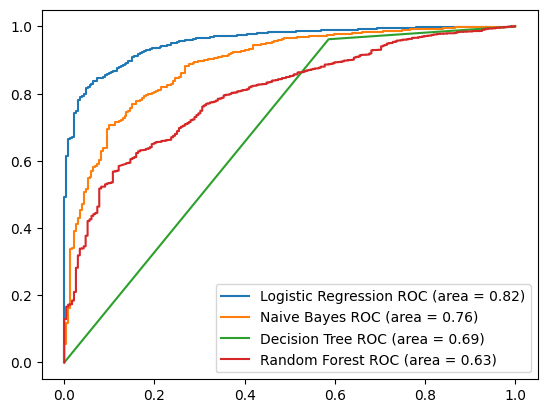

In [99]:
plt.figure(0).clf()

for n in models:
    model = n['model']
    model.fit(X_train_sm,Y_train_sm)
    Y_pred=model.predict(X_test)

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])

    auc = metrics.roc_auc_score(Y_test, model.predict(X_test))

    plt.plot(fpr, tpr, label='%s ROC (area = %.2f)' % (n['label'], auc))

plt.legend();

### Logistic Regression is the best model. Its F1 Score and AUC are both the highest among the four models.

# Conclusion

Compared to the different performance of each model we used, the model using Logistic Regression performs the best. Because its AUC score and F1-Score are the highest, 0.82 and 0.96 among all.
From those charts and tables presented above, we conclude the following points. Firstly, the women’s e-commerce platform can expand the amount of product by producing larger sizes of apparels. Moreover, customers do value the importance of product quality, which reflects on higher ratings and more positive reviews. The platform should make more efforts to improve and maintain its consistent product quality so that the platform can attract new potential customers.
Hopefully, as long as the platform is willing to adjust and adapt to the trends nowadays, it leads to higher profits, better reputation and loyalty to the platform.